# 1. Import Required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization

# 2. Loading the dataset 

In [2]:
df=pd.read_csv("../input/diabetes-dataset/diabetes.csv")

In [3]:
df.head() #get familier with dataset, display the top 5 data records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(768, 9)

In [5]:
df.columns #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes #knowledge of data type helps for computation

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 3. Data Cleaning and Visualization
- Dropping duplicate values
- Checking NULL values


In [9]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [10]:
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outcome', ylabel='count'>

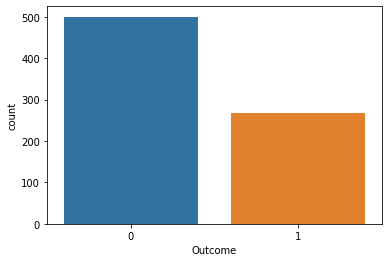

In [11]:
sns.countplot('Outcome',data=df)

## **Conclusion:** We observe that number of persons who do not have diabetes is far more than who do have.

# 4. Store Feature Matrix In X and Response(Target) In Vector y

In [12]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [13]:
X.sample(1) # contains only independent features 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
150,1,136,74,50,204,37.4,0.399,24


In [14]:
y.head() #contains dependent feature

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 5. Train Test Split
 

- The train-test split is a technique for evaluating the performance of a machine learning algorithm.

- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.

- Data splitting percentage:

  Train: 80%, Test: 20%

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=0)

In [16]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [17]:
X_test.shape,y_test.shape

((154, 8), (154,))

## 6. K Nearest Neighbour Algorithm:-

KNN algorithm, is a non-parametric algorithm that classifies data points based on their proximity and association to other available data.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline

## b. Fit Best Model 

In [19]:
knn = Pipeline([('scalar2',StandardScaler()),
                          ('knn_classifier',KNeighborsClassifier())])
knn.fit(X,y)

Pipeline(steps=[('scalar2', StandardScaler()),
                ('knn_classifier', KNeighborsClassifier())])

## c. Predict Test Data using this model

In [20]:
#Predict testing set
knn_pred = knn.predict(X_test)

## d. Performance Metrics : Confusion Matrix, F1 Score, Precision Score, Recall Score
#### **Confusion Matrix**
It is a tabular visualization of the model predictions versus the ground-truth labels. 

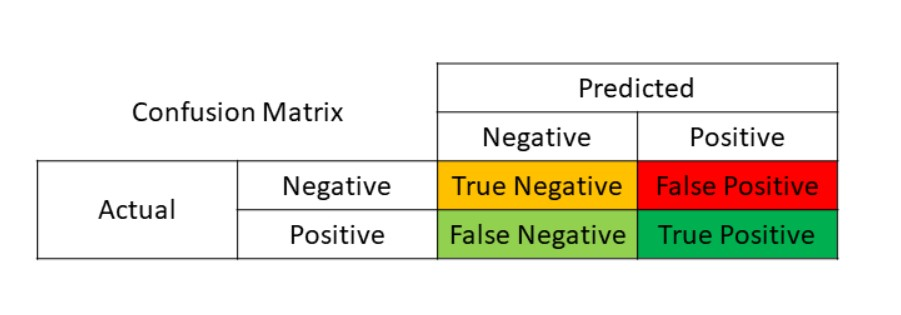

#### **F1 Score**
It’s the harmonic mean between precision and recall. 

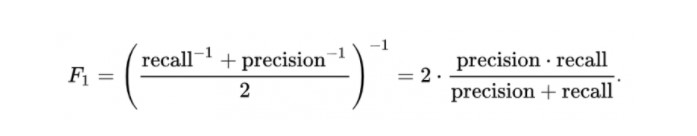

#### **Precision Score**
Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.

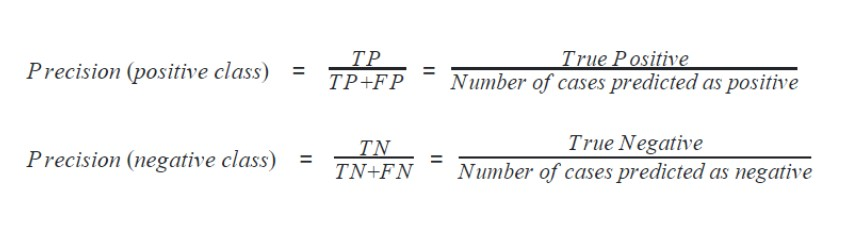


#### **Recall Score**
It is the fraction of positives/negative events that you predicted correctly. 

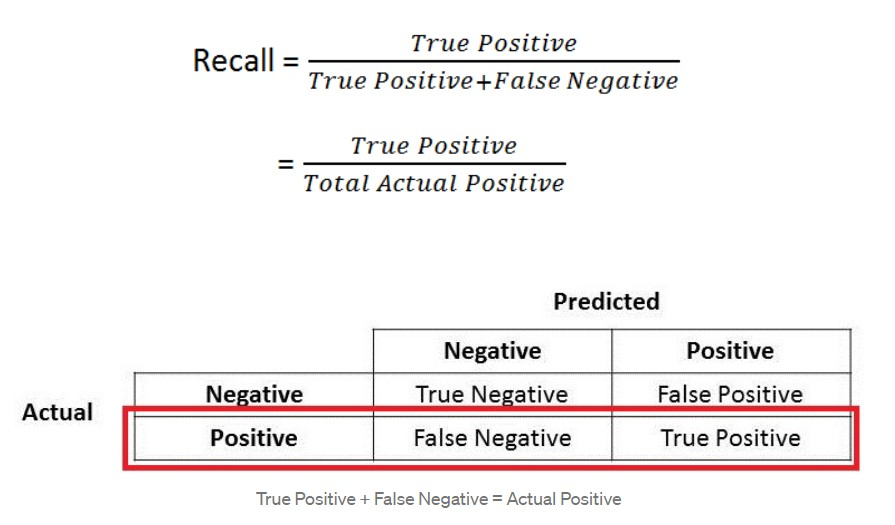



Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       107
           1       0.76      0.68      0.72        47

    accuracy                           0.84       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.83      0.84      0.83       154


 F1:
 0.7191011235955055

 Precision score is:
 0.7619047619047619

 Recall score is:
 0.6808510638297872

 Confusion Matrix:



<AxesSubplot:>

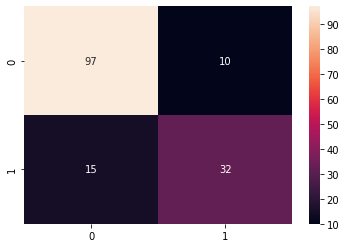

In [21]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True)

In [22]:
print("Test Accuracy:",knn.score(X_test,y_test)*100)

Test Accuracy: 83.76623376623377


## For this dataset, we got 84% of accuracy using KNN classifier.

## 7. Prediction On New Data 

In [23]:
new_data = pd.DataFrame({
    'Pregnancies':8,
    'Glucose':100.0,
    'BloodPressure':52.0,
    'SkinThickness':75.0,
    'Insulin':79.799479,
    'BMI':53.6,
    'DiabetesPedigreeFunction':0.657,
    'Age':20,    
},index=[0])
p = knn.predict(new_data)
if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')

non-diabetic


## 8. Save Model Using Joblib

In [ ]:
import joblib
joblib.dump(knn,'model_joblib_diabetes')
model = joblib.load('model_joblib_diabetes')
model.predict(new_data)

 # 9. GUI 

In [ ]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
   
    model = joblib.load('model_joblib_diabetes')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    
    if result == 0:
        Label(master, text="Non-Diabetic").grid(row=31)
    else:
        Label(master, text="Diabetic").grid(row=31)
    
    
master = Tk()
master.title("Diabetes Prediction Using Machine Learning")


label = Label(master, text = "Diabetes Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Pregnancies").grid(row=1)
Label(master, text="Glucose").grid(row=2)
Label(master, text="Enter Value of BloodPressure").grid(row=3)
Label(master, text="Enter Value of SkinThickness").grid(row=4)
Label(master, text="Enter Value of Insulin").grid(row=5)
Label(master, text="Enter Value of BMI").grid(row=6)
Label(master, text="Enter Value of DiabetesPedigreeFunction").grid(row=7)
Label(master, text="Enter Value of Age").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()